## Panel Regression
### Author: kselvapa

#### Conclusion
The analysis suggests that the unemployment rate is a weak predictor of GDP growth across different regions, with minimal variation in R-squared values, indicating that other factors likely drive economic performance. Analysing R-Squared (Between), in regions like North America and Oceania, the model's performance is worse than a simple mean model, potentially due to the lack of substantial variation in economic conditions or similar economic structures within these regions. Europe, with its diverse economies, shows a more balanced result, where the model neither significantly explains nor fails to explain the variance between countries. The F-statistic further highlights that regions like North America and Africa have stronger model fits, implying that the unemployment rate may have a more notable impact on GDP in these areas, while regions like Oceania and South America show weaker relationships. This suggests that regional economic characteristics and other underlying factors influence the relationship between unemployment and GDP growth that has to be accounted for to improve the model's explanatory power, as evidenced by the varying model fits and statistical significance observed in different regions.

In [60]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel import compare
import numpy as np
from scipy import stats
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

gdp_unemp = pd.read_csv('../Data/gdp_unemp_final.csv')
gdp_unemp.head()

,Country,Continent,Sex,Age_Group,Age_Categories,GDP Growth Rate % [2014],GDP Growth Rate % [2015],GDP Growth Rate % [2016],GDP Growth Rate % [2017],GDP Growth Rate % [2018],GDP Growth Rate % [2019],GDP Growth Rate % [2020],GDP Growth Rate % [2021],GDP Growth Rate % [2022],GDP Growth Rate % [2023],Unemployment Rate [2014],Unemployment Rate [2015],Unemployment Rate [2016],Unemployment Rate [2017],Unemployment Rate [2018],Unemployment Rate [2019],Unemployment Rate [2020],Unemployment Rate [2021],Unemployment Rate [2022],Unemployment Rate [2023]
0,AFGHANISTAN,AS,Female,15-24,Youth,2.7,1.0,2.2,2.6,1.2,3.9,-2.4,-14.5,-6.2,2.7,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200
1,AFGHANISTAN,AS,Female,25+,Adults,2.7,1.0,2.2,2.6,1.2,3.9,-2.4,-14.5,-6.2,2.7,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192
2,AFGHANISTAN,AS,Male,15-24,Youth,2.7,1.0,2.2,2.6,1.2,3.9,-2.4,-14.5,-6.2,2.7,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512
3,AFGHANISTAN,AS,Male,25+,Adults,2.7,1.0,2.2,2.6,1.2,3.9,-2.4,-14.5,-6.2,2.7,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327
4,ALBANIA,EU,Female,15-24,Youth,1.8,2.2,3.3,3.8,4.0,2.1,-3.3,8.9,4.9,3.5,32.590,40.274,34.102,27.429,25.765,26.005,29.766,28.687,27.004,25.758


In [61]:
gdp_unemp['Continent'].unique()

array(['AS', 'EU', 'AF', 'SAM', 'OC', 'AS/EU', 'NAM'], dtype=object)

In [62]:
# Aggregate the mean by 'Country' and reset the index
gdp_unemp_agg_reset = (
    gdp_unemp
    .groupby('Country', as_index=False)
    .mean(numeric_only=True)  # Calculate the mean for numeric columns only
)
# Display the first few rows
gdp_unemp_agg_reset.head()

,Country,GDP Growth Rate % [2014],GDP Growth Rate % [2015],GDP Growth Rate % [2016],GDP Growth Rate % [2017],GDP Growth Rate % [2018],GDP Growth Rate % [2019],GDP Growth Rate % [2020],GDP Growth Rate % [2021],GDP Growth Rate % [2022],GDP Growth Rate % [2023],Unemployment Rate [2014],Unemployment Rate [2015],Unemployment Rate [2016],Unemployment Rate [2017],Unemployment Rate [2018],Unemployment Rate [2019],Unemployment Rate [2020],Unemployment Rate [2021],Unemployment Rate [2022],Unemployment Rate [2023]
0,AFGHANISTAN,2.7,1.0,2.2,2.6,1.2,3.9,-2.4,-14.5,-6.2,2.7,9.39625,10.84225,12.27650,13.70300,13.72600,13.76575,14.62275,15.08825,20.59775,22.30775
1,ALBANIA,1.8,2.2,3.3,3.8,4.0,2.1,-3.3,8.9,4.9,3.5,26.51550,27.07275,24.29625,21.07475,19.04600,18.26250,20.69025,20.12650,18.99000,18.15625
2,ALGERIA,4.1,3.2,3.9,1.5,1.4,0.9,-5.0,3.8,3.6,4.1,20.07875,22.77475,21.74250,24.38900,24.75850,25.07025,28.48025,27.43150,25.79900,25.35050
3,ANGOLA,4.7,0.8,-1.7,-0.1,-0.6,-0.2,-4.0,2.1,4.2,1.0,22.54875,22.49700,22.42900,22.25800,21.98375,21.56400,21.98850,20.55575,19.05525,18.73725
4,ARGENTINA,-2.5,2.7,-2.1,2.8,-2.6,-2.0,-9.9,10.4,5.3,-1.6,12.57825,13.26225,14.21925,14.84425,15.75250,16.87075,20.02625,15.32050,12.25650,12.13175


#### Reshaping Data

In [63]:
# Reshape GDP Growth Rate
gdp_long = gdp_unemp_agg_reset.melt(id_vars=['Country'], 
                   value_vars=[col for col in gdp_unemp_agg_reset.columns if 'GDP Growth Rate' in col],
                   var_name='Year', value_name='GDP Growth Rate')

# Reshape Unemployment Rate
unemp_long = gdp_unemp_agg_reset.melt(id_vars=['Country'], 
                     value_vars=[col for col in gdp_unemp_agg_reset.columns if 'Unemployment Rate' in col],
                     var_name='Year', value_name='Unemployment Rate')

# Merge the two datasets
gdp_long['Year'] = gdp_long['Year'].str.extract(r'(\d{4})').astype(int)
unemp_long['Year'] = unemp_long['Year'].str.extract(r'(\d{4})').astype(int)
merged_df = pd.merge(gdp_long, unemp_long, on=['Country', 'Year'])

merged_df.head()

,Country,Year,GDP Growth Rate,Unemployment Rate
0,AFGHANISTAN,2014,2.7,9.39625
1,ALBANIA,2014,1.8,26.51550
2,ALGERIA,2014,4.1,20.07875
3,ANGOLA,2014,4.7,22.54875
4,ARGENTINA,2014,-2.5,12.57825


#### Determine whether to use Fixed Effects (FE) or Random Effects (RE) using Hausman Test 
The Hausman statistic is used to test whether there is a significant difference between the coefficients estimated by the Fixed Effects (FE) and Random Effects (RE) models. It tells us whether the unobserved effects (like country-specific factors) are correlated with the independent variable (Unemployment Rate).


In [64]:
# Ensure 'Country' and 'Year' are the multi-index
merged_df_reset = merged_df.set_index(['Country', 'Year'])
merged_df_reset.head()

,,GDP Growth Rate,Unemployment Rate
Country,Year,,
AFGHANISTAN,2014,2.7,9.39625
ALBANIA,2014,1.8,26.51550
ALGERIA,2014,4.1,20.07875
ANGOLA,2014,4.7,22.54875
ARGENTINA,2014,-2.5,12.57825


In [65]:
# Fixed Effects Model
fe_model = PanelOLS.from_formula('Q("GDP Growth Rate") ~ Q("Unemployment Rate") + EntityEffects', data=merged_df_reset)
fe_res = fe_model.fit()

# Random Effects Model
re_model = RandomEffects.from_formula('Q("GDP Growth Rate") ~ Q("Unemployment Rate")', data=merged_df_reset)
re_res = re_model.fit()

# Hausman Test Comparison
comparison = compare({'Fixed Effects': fe_res, 'Random Effects': re_res})
print(comparison)

                              Model Comparison                              
                                      Fixed Effects           Random Effects
----------------------------------------------------------------------------
Dep. Variable                  Q('GDP Growth Rate')     Q('GDP Growth Rate')
Estimator                                  PanelOLS            RandomEffects
No. Observations                               1760                     1760
Cov. Est.                                Unadjusted               Unadjusted
R-squared                                    0.0205                   0.0204
R-Squared (Within)                           0.0205                  -0.0130
R-Squared (Between)                         -3.3345                   0.2476
R-Squared (Overall)                         -1.0972                   0.0738
F-statistic                                  33.186                   36.625
P-value (F-stat)                             0.0000                   0.0000

In [66]:
# Extract coefficients and covariance matrices
b_fe = fe_res.params
b_re = re_res.params

# Calculate the difference between coefficients
coeff_diff = b_fe - b_re

# Variance difference (covariance matrix of FE - covariance matrix of RE)
var_diff = fe_res.cov - re_res.cov

# Hausman statistic calculation
hausman_stat = coeff_diff.T @ np.linalg.inv(var_diff) @ coeff_diff

# Degrees of freedom: number of regressors
df = len(coeff_diff)

# P-value calculation
p_value = 1 - stats.chi2.cdf(hausman_stat, df)

print(f"Hausman Statistic: {hausman_stat:.4f}")
print("p-value:", p_value)

Hausman Statistic: 58.3342
p-value: 2.2093438190040615e-14


Hausman Statistic (58.3342):

A large value (like 58.33) indicates a significant difference between the FE and RE coefficients. This suggests that the RE model’s assumption of no correlation between unobserved effects and the independent variable is violated.

P-value (0.0000):

Since the p-value is essentially 0, it means the difference in coefficients is statistically significant. You reject the null hypothesis, confirming that the Fixed Effects model is better.


### General Analysis for all countries across years [Fixed Model]

In [67]:
# Fixed Effects Model
fe_model = PanelOLS.from_formula('Q("GDP Growth Rate") ~ Q("Unemployment Rate") + EntityEffects', data=merged_df_reset)
fe_res = fe_model.fit()

# Display the results
print(fe_res)

                           PanelOLS Estimation Summary                            
Dep. Variable:     Q('GDP Growth Rate')   R-squared:                        0.0205
Estimator:                     PanelOLS   R-squared (Between):             -3.3345
No. Observations:                  1760   R-squared (Within):               0.0205
Date:                  Fri, Dec 06 2024   R-squared (Overall):             -1.0972
Time:                          22:57:02   Log-likelihood                   -5392.9
Cov. Estimator:              Unadjusted                                           
                                          F-statistic:                      33.186
Entities:                           176   P-value                           0.0000
Avg Obs:                        10.0000   Distribution:                  F(1,1583)
Min Obs:                        10.0000                                           
Max Obs:                        10.0000   F-statistic (robust):             33.186
    

### Continent-based Analysis for all countries across years [Fixed Model]

#### Asia

In [68]:
# Extracting Asian Countries for Combined Dataset
asia_df = gdp_unemp[(gdp_unemp['Continent'] == 'AS') | (gdp_unemp['Continent'] == 'AS/EU')]

# Aggregating Countries
asia_mean_reset = (
    asia_df
    .groupby('Country', as_index=False)
    .mean(numeric_only = True)  # Calculate the mean for all columns
)
# Display the first few rows
asia_mean_reset.head()

,Country,GDP Growth Rate % [2014],GDP Growth Rate % [2015],GDP Growth Rate % [2016],GDP Growth Rate % [2017],GDP Growth Rate % [2018],GDP Growth Rate % [2019],GDP Growth Rate % [2020],GDP Growth Rate % [2021],GDP Growth Rate % [2022],GDP Growth Rate % [2023],Unemployment Rate [2014],Unemployment Rate [2015],Unemployment Rate [2016],Unemployment Rate [2017],Unemployment Rate [2018],Unemployment Rate [2019],Unemployment Rate [2020],Unemployment Rate [2021],Unemployment Rate [2022],Unemployment Rate [2023]
0,AFGHANISTAN,2.7,1.0,2.2,2.6,1.2,3.9,-2.4,-14.5,-6.2,2.7,9.39625,10.84225,12.27650,13.7030,13.72600,13.76575,14.62275,15.08825,20.59775,22.30775
1,ARMENIA,3.6,3.3,0.2,7.5,5.2,7.6,-7.1,5.8,12.6,8.3,15.69825,16.58650,17.50325,18.4635,19.42725,17.70275,17.42025,15.67125,13.25450,12.98200
2,AZERBAIJAN,2.8,1.1,-3.1,0.2,1.5,2.5,-4.2,5.6,4.7,1.1,8.52250,8.52850,8.36700,8.1695,7.81325,7.77450,10.70125,9.71825,9.14100,9.14925
3,BAHRAIN,4.3,2.5,3.8,5.0,2.1,2.1,-5.9,4.4,6.0,3.0,4.45625,4.41000,4.50625,4.5885,4.66125,4.72400,5.76650,5.39900,4.81800,4.70975
4,BANGLADESH,6.1,6.6,7.1,6.6,7.3,7.9,3.4,6.9,7.1,5.8,7.33425,7.55400,7.75450,8.1410,8.16925,8.21075,9.72250,9.59325,8.39525,8.24175


In [69]:
# Reshape GDP Growth Rate
asia_gdp_long = asia_mean_reset.melt(id_vars=['Country'], 
                   value_vars=[col for col in asia_mean_reset.columns if 'GDP Growth Rate' in col],
                   var_name='Year', value_name='GDP Growth Rate')

# Reshape Unemployment Rate
asia_unemp_long = asia_mean_reset.melt(id_vars=['Country'], 
                     value_vars=[col for col in asia_mean_reset.columns if 'Unemployment Rate' in col],
                     var_name='Year', value_name='Unemployment Rate')

# Merge the two datasets
asia_gdp_long['Year'] = asia_gdp_long['Year'].str.extract(r'(\d{4})').astype(int)
asia_unemp_long['Year'] = asia_unemp_long['Year'].str.extract(r'(\d{4})').astype(int)
asia_merged_df = pd.merge(asia_gdp_long, asia_unemp_long, on=['Country', 'Year'])

# Ensure 'Country' and 'Year' are the multi-index
asia_merged_df = asia_merged_df.set_index(['Country', 'Year'])
asia_merged_df.head()

,,GDP Growth Rate,Unemployment Rate
Country,Year,,
AFGHANISTAN,2014,2.7,9.39625
ARMENIA,2014,3.6,15.69825
AZERBAIJAN,2014,2.8,8.52250
BAHRAIN,2014,4.3,4.45625
BANGLADESH,2014,6.1,7.33425


In [70]:
# Fixed Effects Model
asia_fe_model = PanelOLS.from_formula('Q("GDP Growth Rate") ~ Q("Unemployment Rate") + EntityEffects', data=asia_merged_df)
asia_fe_res = asia_fe_model.fit()

# Display the results
print(asia_fe_res)

                           PanelOLS Estimation Summary                            
Dep. Variable:     Q('GDP Growth Rate')   R-squared:                        0.0290
Estimator:                     PanelOLS   R-squared (Between):             -5.7396
No. Observations:                   470   R-squared (Within):               0.0290
Date:                  Fri, Dec 06 2024   R-squared (Overall):             -1.4584
Time:                          22:57:02   Log-likelihood                   -1538.5
Cov. Estimator:              Unadjusted                                           
                                          F-statistic:                      12.603
Entities:                            47   P-value                           0.0004
Avg Obs:                        10.0000   Distribution:                   F(1,422)
Min Obs:                        10.0000                                           
Max Obs:                        10.0000   F-statistic (robust):             12.603
    

#### Oceania

In [71]:
# Extracting Oceania Countries for Combined Dataset
oceania_df = gdp_unemp[(gdp_unemp['Continent'] == 'OC')]

# Aggregating Countries
oceania_mean_reset = (
    oceania_df
    .groupby('Country', as_index=False)
    .mean(numeric_only=True)  # Calculate the mean for numeric columns only
)
# Display the first few rows
oceania_mean_reset.head()

,Country,GDP Growth Rate % [2014],GDP Growth Rate % [2015],GDP Growth Rate % [2016],GDP Growth Rate % [2017],GDP Growth Rate % [2018],GDP Growth Rate % [2019],GDP Growth Rate % [2020],GDP Growth Rate % [2021],GDP Growth Rate % [2022],GDP Growth Rate % [2023],Unemployment Rate [2014],Unemployment Rate [2015],Unemployment Rate [2016],Unemployment Rate [2017],Unemployment Rate [2018],Unemployment Rate [2019],Unemployment Rate [2020],Unemployment Rate [2021],Unemployment Rate [2022],Unemployment Rate [2023]
0,AUSTRALIA,2.6,2.4,2.7,2.4,2.8,1.8,-2.1,5.5,3.9,2.0,8.95400,8.86025,8.47400,8.39325,7.89500,7.80650,9.6040,7.59650,5.54850,5.52350
1,FIJI,5.6,4.5,2.4,5.4,3.8,-0.6,-17.0,-4.9,19.8,7.5,8.81800,9.02600,9.35725,9.53925,9.68600,9.77875,10.8685,10.74025,10.07200,9.48475
2,NEW ZEALAND,3.8,3.6,3.9,3.3,3.5,3.1,-1.4,5.6,2.4,0.6,9.01275,8.88900,8.58625,8.16100,7.43425,7.10575,7.8805,6.54800,5.79025,6.59325
3,PAPUA NEW GUINEA,13.5,6.6,5.5,3.5,-0.3,4.5,-3.2,-0.8,5.2,2.9,3.23325,3.22625,3.22025,3.32800,3.40125,3.42250,3.8635,3.98800,3.52525,3.47625
4,SAMOA,0.7,3.9,8.0,1.4,-0.6,4.5,-3.1,-7.1,-5.3,8.0,11.94800,12.53950,13.17525,13.94725,14.10600,14.31675,15.6165,15.67075,14.98225,14.29100


In [72]:
# Reshape GDP Growth Rate
oceania_gdp_long = oceania_mean_reset.melt(id_vars=['Country'], 
                   value_vars=[col for col in oceania_mean_reset.columns if 'GDP Growth Rate' in col],
                   var_name='Year', value_name='GDP Growth Rate')

# Reshape Unemployment Rate
oceania_unemp_long = oceania_mean_reset.melt(id_vars=['Country'], 
                     value_vars=[col for col in oceania_mean_reset.columns if 'Unemployment Rate' in col],
                     var_name='Year', value_name='Unemployment Rate')

# Merge the two datasets
oceania_gdp_long['Year'] = oceania_gdp_long['Year'].str.extract(r'(\d{4})').astype(int)
oceania_unemp_long['Year'] = oceania_unemp_long['Year'].str.extract(r'(\d{4})').astype(int)
oceania_merged_df = pd.merge(oceania_gdp_long, oceania_unemp_long, on=['Country', 'Year'])

# Ensure 'Country' and 'Year' are the multi-index
oceania_merged_df = oceania_merged_df.set_index(['Country', 'Year'])
oceania_merged_df.head()

,,GDP Growth Rate,Unemployment Rate
Country,Year,,
AUSTRALIA,2014,2.6,8.95400
FIJI,2014,5.6,8.81800
NEW ZEALAND,2014,3.8,9.01275
PAPUA NEW GUINEA,2014,13.5,3.23325
SAMOA,2014,0.7,11.94800


In [73]:
# Fixed Effects Model
oceania_fe_model = PanelOLS.from_formula('Q("GDP Growth Rate") ~ Q("Unemployment Rate") + EntityEffects', data=oceania_merged_df)
oceania_fe_res = oceania_fe_model.fit()

# Display the results
print(oceania_fe_res)

                           PanelOLS Estimation Summary                            
Dep. Variable:     Q('GDP Growth Rate')   R-squared:                        0.0584
Estimator:                     PanelOLS   R-squared (Between):             -24.292
No. Observations:                    80   R-squared (Within):               0.0584
Date:                  Fri, Dec 06 2024   R-squared (Overall):             -5.7123
Time:                          22:57:03   Log-likelihood                   -227.91
Cov. Estimator:              Unadjusted                                           
                                          F-statistic:                      4.4032
Entities:                             8   P-value                           0.0394
Avg Obs:                        10.0000   Distribution:                    F(1,71)
Min Obs:                        10.0000                                           
Max Obs:                        10.0000   F-statistic (robust):             4.4032
    

#### North America

In [74]:
# Extracting North American Countries for Combined Dataset
northam_df = gdp_unemp[(gdp_unemp['Continent'] == 'NAM')]

# Aggregating Countries
northam_mean_reset = (
    northam_df
    .groupby('Country', as_index=False)
    .mean(numeric_only=True)  # Calculate the mean for numeric columns only
)
# Display the first few rows
northam_mean_reset.head()

,Country,GDP Growth Rate % [2014],GDP Growth Rate % [2015],GDP Growth Rate % [2016],GDP Growth Rate % [2017],GDP Growth Rate % [2018],GDP Growth Rate % [2019],GDP Growth Rate % [2020],GDP Growth Rate % [2021],GDP Growth Rate % [2022],GDP Growth Rate % [2023],Unemployment Rate [2014],Unemployment Rate [2015],Unemployment Rate [2016],Unemployment Rate [2017],Unemployment Rate [2018],Unemployment Rate [2019],Unemployment Rate [2020],Unemployment Rate [2021],Unemployment Rate [2022],Unemployment Rate [2023]
0,BAHAMAS,1.8,1.0,-1.0,2.8,2.6,-1.4,-21.4,15.4,10.8,2.6,20.36875,17.64200,18.70000,15.17050,16.08600,16.11975,20.14600,18.51450,16.70025,15.81775
1,BARBADOS,0.2,-0.8,1.8,0.1,-1.2,0.7,-15.1,-0.3,17.8,4.1,21.10650,18.10650,16.10475,16.30000,15.19075,15.72550,18.22500,17.41250,16.09375,15.12725
2,BELIZE,4.0,3.2,0.0,-1.8,1.1,4.2,-13.7,17.9,9.8,1.1,13.45525,12.05800,11.91500,11.13825,12.83425,14.33025,16.28400,14.91050,13.21900,12.74750
3,CANADA,2.9,0.6,1.0,3.0,2.7,1.9,-5.0,5.3,3.8,1.2,9.55575,9.33150,9.32425,8.41225,7.86700,7.78450,14.05950,10.05725,7.30575,7.58400
4,COSTA RICA,3.5,3.7,4.2,4.2,2.6,2.4,-4.3,7.9,4.6,5.1,15.41425,14.58725,14.43900,13.77375,16.44825,19.96800,27.36175,26.00500,20.25850,15.83050


In [75]:
# Reshape GDP Growth Rate
northam_gdp_long = northam_mean_reset.melt(id_vars=['Country'], 
                   value_vars=[col for col in northam_mean_reset.columns if 'GDP Growth Rate' in col],
                   var_name='Year', value_name='GDP Growth Rate')

# Reshape Unemployment Rate
northam_unemp_long = northam_mean_reset.melt(id_vars=['Country'], 
                     value_vars=[col for col in northam_mean_reset.columns if 'Unemployment Rate' in col],
                     var_name='Year', value_name='Unemployment Rate')

# Merge the two datasets
northam_gdp_long['Year'] = northam_gdp_long['Year'].str.extract(r'(\d{4})').astype(int)
northam_unemp_long['Year'] = northam_unemp_long['Year'].str.extract(r'(\d{4})').astype(int)
northam_merged_df = pd.merge(northam_gdp_long, northam_unemp_long, on=['Country', 'Year'])

# Ensure 'Country' and 'Year' are the multi-index
northam_merged_df = northam_merged_df.set_index(['Country', 'Year'])
northam_merged_df.head()

,,GDP Growth Rate,Unemployment Rate
Country,Year,,
BAHAMAS,2014,1.8,20.36875
BARBADOS,2014,0.2,21.10650
BELIZE,2014,4.0,13.45525
CANADA,2014,2.9,9.55575
COSTA RICA,2014,3.5,15.41425


In [76]:
# Fixed Effects Model
northam_fe_model = PanelOLS.from_formula('Q("GDP Growth Rate") ~ Q("Unemployment Rate") + EntityEffects', data=northam_merged_df)
northam_fe_res = northam_fe_model.fit()

# Display the results
print(northam_fe_res)

                           PanelOLS Estimation Summary                            
Dep. Variable:     Q('GDP Growth Rate')   R-squared:                        0.0934
Estimator:                     PanelOLS   R-squared (Between):             -22.563
No. Observations:                   190   R-squared (Within):               0.0934
Date:                  Fri, Dec 06 2024   R-squared (Overall):             -4.2011
Time:                          22:57:03   Log-likelihood                   -579.34
Cov. Estimator:              Unadjusted                                           
                                          F-statistic:                      17.515
Entities:                            19   P-value                           0.0000
Avg Obs:                        10.0000   Distribution:                   F(1,170)
Min Obs:                        10.0000                                           
Max Obs:                        10.0000   F-statistic (robust):             17.515
    

#### South America

In [77]:
# Extracting South American Countries for Combined Dataset
southam_df = gdp_unemp[(gdp_unemp['Continent'] == 'SAM')]

# Aggregating Countries
southam_mean_reset = (
    southam_df
    .groupby('Country', as_index=False)
    .mean(numeric_only=True)  # Calculate the mean for numeric columns only
)
# Display the first few rows
southam_mean_reset.head()

,Country,GDP Growth Rate % [2014],GDP Growth Rate % [2015],GDP Growth Rate % [2016],GDP Growth Rate % [2017],GDP Growth Rate % [2018],GDP Growth Rate % [2019],GDP Growth Rate % [2020],GDP Growth Rate % [2021],GDP Growth Rate % [2022],GDP Growth Rate % [2023],Unemployment Rate [2014],Unemployment Rate [2015],Unemployment Rate [2016],Unemployment Rate [2017],Unemployment Rate [2018],Unemployment Rate [2019],Unemployment Rate [2020],Unemployment Rate [2021],Unemployment Rate [2022],Unemployment Rate [2023]
0,ARGENTINA,-2.5,2.7,-2.1,2.8,-2.6,-2.0,-9.9,10.4,5.3,-1.6,12.57825,13.26225,14.21925,14.84425,15.75250,16.87075,20.02625,15.32050,12.25650,12.13175
1,BOLIVIA,5.5,4.9,4.3,4.2,4.2,2.2,-8.7,6.1,3.6,3.1,3.16275,4.70700,4.84950,4.88150,4.75300,4.99025,10.90500,6.47025,4.70725,5.38025
2,BRAZIL,0.5,-3.5,-3.3,1.3,1.8,1.2,-3.3,4.8,3.0,2.9,10.39725,13.11075,17.74300,19.25425,18.75525,18.23525,20.74675,19.62800,14.12400,12.04225
3,CHILE,1.8,2.2,1.8,1.4,4.0,0.6,-6.1,11.3,2.1,0.2,11.33900,10.86275,10.94925,11.55400,12.13600,12.83275,17.22675,14.55125,12.97000,14.99500
4,COLOMBIA,4.5,3.0,2.1,1.4,2.6,3.2,-7.2,10.8,7.3,0.6,12.99225,12.56425,13.12950,13.37575,13.98800,15.05625,21.44175,19.14225,15.47950,14.01900


In [78]:
# Reshape GDP Growth Rate
southam_gdp_long = southam_mean_reset.melt(id_vars=['Country'], 
                   value_vars=[col for col in southam_mean_reset.columns if 'GDP Growth Rate' in col],
                   var_name='Year', value_name='GDP Growth Rate')

# Reshape Unemployment Rate
southam_unemp_long = southam_mean_reset.melt(id_vars=['Country'], 
                     value_vars=[col for col in southam_mean_reset.columns if 'Unemployment Rate' in col],
                     var_name='Year', value_name='Unemployment Rate')

# Merge the two datasets
southam_gdp_long['Year'] = southam_gdp_long['Year'].str.extract(r'(\d{4})').astype(int)
southam_unemp_long['Year'] = southam_unemp_long['Year'].str.extract(r'(\d{4})').astype(int)
southam_merged_df = pd.merge(southam_gdp_long, southam_unemp_long, on=['Country', 'Year'])

# Ensure 'Country' and 'Year' are the multi-index
southam_merged_df = southam_merged_df.set_index(['Country', 'Year'])
southam_merged_df.head()

,,GDP Growth Rate,Unemployment Rate
Country,Year,,
ARGENTINA,2014,-2.5,12.57825
BOLIVIA,2014,5.5,3.16275
BRAZIL,2014,0.5,10.39725
CHILE,2014,1.8,11.33900
COLOMBIA,2014,4.5,12.99225


In [79]:
# Fixed Effects Model
southam_fe_model = PanelOLS.from_formula('Q("GDP Growth Rate") ~ Q("Unemployment Rate") + EntityEffects', data=southam_merged_df)
southam_fe_res = southam_fe_model.fit()

# Display the results
print(southam_fe_res)

                           PanelOLS Estimation Summary                            
Dep. Variable:     Q('GDP Growth Rate')   R-squared:                        0.0263
Estimator:                     PanelOLS   R-squared (Between):             -2.6062
No. Observations:                   120   R-squared (Within):               0.0263
Date:                  Fri, Dec 06 2024   R-squared (Overall):             -0.9839
Time:                          22:57:03   Log-likelihood                   -417.83
Cov. Estimator:              Unadjusted                                           
                                          F-statistic:                      2.8874
Entities:                            12   P-value                           0.0922
Avg Obs:                        10.0000   Distribution:                   F(1,107)
Min Obs:                        10.0000                                           
Max Obs:                        10.0000   F-statistic (robust):             2.8874
    

#### Africa

In [80]:
# Extracting African Countries for Combined Dataset
africa_df = gdp_unemp[(gdp_unemp['Continent'] == 'AF')]

# Aggregating Countries
africa_mean_reset = (
    africa_df
    .groupby('Country', as_index=False)
    .mean(numeric_only=True)  # Calculate the mean for numeric columns only
)
# Display the first few rows
africa_mean_reset.head()

,Country,GDP Growth Rate % [2014],GDP Growth Rate % [2015],GDP Growth Rate % [2016],GDP Growth Rate % [2017],GDP Growth Rate % [2018],GDP Growth Rate % [2019],GDP Growth Rate % [2020],GDP Growth Rate % [2021],GDP Growth Rate % [2022],GDP Growth Rate % [2023],Unemployment Rate [2014],Unemployment Rate [2015],Unemployment Rate [2016],Unemployment Rate [2017],Unemployment Rate [2018],Unemployment Rate [2019],Unemployment Rate [2020],Unemployment Rate [2021],Unemployment Rate [2022],Unemployment Rate [2023]
0,ALGERIA,4.1,3.2,3.9,1.5,1.4,0.9,-5.0,3.8,3.6,4.1,20.07875,22.77475,21.74250,24.38900,24.75850,25.07025,28.48025,27.43150,25.79900,25.35050
1,ANGOLA,4.7,0.8,-1.7,-0.1,-0.6,-0.2,-4.0,2.1,4.2,1.0,22.54875,22.49700,22.42900,22.25800,21.98375,21.56400,21.98850,20.55575,19.05525,18.73725
2,BENIN,6.4,1.8,3.3,5.7,6.7,6.9,3.8,7.2,6.3,6.4,2.77725,2.78275,2.81625,2.71475,2.40550,2.29925,2.66800,2.77975,2.44400,2.33575
3,BOTSWANA,5.7,-4.9,7.2,4.1,4.2,3.0,-8.7,11.9,5.5,2.7,25.00050,25.48850,25.91825,26.21725,25.96375,26.35950,29.59050,32.02725,31.98825,32.01550
4,BURKINA FASO,4.3,3.9,6.0,6.2,6.6,5.5,1.9,6.9,1.8,3.1,5.14325,5.42075,5.57025,5.63175,5.64975,5.67650,6.25075,6.39000,6.06200,5.98500


In [81]:
# Reshape GDP Growth Rate
africa_gdp_long = africa_mean_reset.melt(id_vars=['Country'], 
                   value_vars=[col for col in africa_mean_reset.columns if 'GDP Growth Rate' in col],
                   var_name='Year', value_name='GDP Growth Rate')

# Reshape Unemployment Rate
africa_unemp_long = africa_mean_reset.melt(id_vars=['Country'], 
                     value_vars=[col for col in africa_mean_reset.columns if 'Unemployment Rate' in col],
                     var_name='Year', value_name='Unemployment Rate')

# Merge the two datasets
africa_gdp_long['Year'] = africa_gdp_long['Year'].str.extract(r'(\d{4})').astype(int)
africa_unemp_long['Year'] = africa_unemp_long['Year'].str.extract(r'(\d{4})').astype(int)
africa_merged_df = pd.merge(africa_gdp_long, africa_unemp_long, on=['Country', 'Year'])

# Ensure 'Country' and 'Year' are the multi-index
africa_merged_df = africa_merged_df.set_index(['Country', 'Year'])
africa_merged_df.head()

,,GDP Growth Rate,Unemployment Rate
Country,Year,,
ALGERIA,2014,4.1,20.07875
ANGOLA,2014,4.7,22.54875
BENIN,2014,6.4,2.77725
BOTSWANA,2014,5.7,25.00050
BURKINA FASO,2014,4.3,5.14325


In [82]:
# Fixed Effects Model
africa_fe_model = PanelOLS.from_formula('Q("GDP Growth Rate") ~ Q("Unemployment Rate") + EntityEffects', data=africa_merged_df)
africa_fe_res = africa_fe_model.fit()

# Display the results
print(africa_fe_res)

                           PanelOLS Estimation Summary                            
Dep. Variable:     Q('GDP Growth Rate')   R-squared:                        0.0342
Estimator:                     PanelOLS   R-squared (Between):             -9.2453
No. Observations:                   520   R-squared (Within):               0.0342
Date:                  Fri, Dec 06 2024   R-squared (Overall):             -4.1606
Time:                          22:57:03   Log-likelihood                   -1472.6
Cov. Estimator:              Unadjusted                                           
                                          F-statistic:                      16.558
Entities:                            52   P-value                           0.0001
Avg Obs:                        10.0000   Distribution:                   F(1,467)
Min Obs:                        10.0000                                           
Max Obs:                        10.0000   F-statistic (robust):             16.558
    

#### Europe

In [83]:
# Extracting European Countries for Combined Dataset
europe_df = gdp_unemp[(gdp_unemp['Continent'] == 'EU') | (gdp_unemp['Continent'] == 'AS/EU')]

# Aggregating Countries
europe_mean_reset = (
    europe_df
    .groupby('Country', as_index=False)
    .mean(numeric_only=True)  # Calculate the mean for numeric columns only
)
# Display the first few rows
europe_mean_reset.head()

,Country,GDP Growth Rate % [2014],GDP Growth Rate % [2015],GDP Growth Rate % [2016],GDP Growth Rate % [2017],GDP Growth Rate % [2018],GDP Growth Rate % [2019],GDP Growth Rate % [2020],GDP Growth Rate % [2021],GDP Growth Rate % [2022],GDP Growth Rate % [2023],Unemployment Rate [2014],Unemployment Rate [2015],Unemployment Rate [2016],Unemployment Rate [2017],Unemployment Rate [2018],Unemployment Rate [2019],Unemployment Rate [2020],Unemployment Rate [2021],Unemployment Rate [2022],Unemployment Rate [2023]
0,ALBANIA,1.8,2.2,3.3,3.8,4.0,2.1,-3.3,8.9,4.9,3.5,26.51550,27.07275,24.29625,21.07475,19.04600,18.26250,20.69025,20.12650,18.99000,18.15625
1,AUSTRIA,0.7,1.0,2.0,2.3,2.4,1.5,-6.6,4.2,4.8,-0.8,7.71275,7.95300,8.31650,7.43475,6.92975,6.36450,7.39575,8.91850,7.33450,7.53000
2,AZERBAIJAN,2.8,1.1,-3.1,0.2,1.5,2.5,-4.2,5.6,4.7,1.1,8.52250,8.52850,8.36700,8.16950,7.81325,7.77450,10.70125,9.71825,9.14100,9.14925
3,BELARUS,1.7,-3.8,-2.5,2.5,3.1,1.4,-0.7,2.4,-4.7,3.9,8.06350,8.04425,8.00875,7.30825,7.40050,6.90600,7.67175,6.91100,6.63350,6.40000
4,BELGIUM,1.6,2.0,1.3,1.6,1.8,2.2,-5.3,6.9,3.0,1.4,15.16175,14.58425,13.37125,12.65250,10.43025,9.36775,10.04625,11.65725,10.48525,9.52350


In [84]:
# Reshape GDP Growth Rate
europe_gdp_long = europe_mean_reset.melt(id_vars=['Country'], 
                   value_vars=[col for col in europe_mean_reset.columns if 'GDP Growth Rate' in col],
                   var_name='Year', value_name='GDP Growth Rate')

# Reshape Unemployment Rate
europe_unemp_long = europe_mean_reset.melt(id_vars=['Country'], 
                     value_vars=[col for col in europe_mean_reset.columns if 'Unemployment Rate' in col],
                     var_name='Year', value_name='Unemployment Rate')

# Merge the two datasets
europe_gdp_long['Year'] = europe_gdp_long['Year'].str.extract(r'(\d{4})').astype(int)
europe_unemp_long['Year'] = europe_unemp_long['Year'].str.extract(r'(\d{4})').astype(int)
europe_merged_df = pd.merge(europe_gdp_long, europe_unemp_long, on=['Country', 'Year'])

# Ensure 'Country' and 'Year' are the multi-index
europe_merged_df = europe_merged_df.set_index(['Country', 'Year'])
europe_merged_df.head()

,,GDP Growth Rate,Unemployment Rate
Country,Year,,
ALBANIA,2014,1.8,26.51550
AUSTRIA,2014,0.7,7.71275
AZERBAIJAN,2014,2.8,8.52250
BELARUS,2014,1.7,8.06350
BELGIUM,2014,1.6,15.16175


In [85]:
# Fixed Effects Model
europe_fe_model = PanelOLS.from_formula('Q("GDP Growth Rate") ~ Q("Unemployment Rate") + EntityEffects', data=europe_merged_df)
europe_fe_res = europe_fe_model.fit()

# Display the results
print(europe_fe_res)

                           PanelOLS Estimation Summary                            
Dep. Variable:     Q('GDP Growth Rate')   R-squared:                        0.0043
Estimator:                     PanelOLS   R-squared (Between):             -0.6849
No. Observations:                   420   R-squared (Within):               0.0043
Date:                  Fri, Dec 06 2024   R-squared (Overall):             -0.2835
Time:                          22:57:03   Log-likelihood                   -1126.7
Cov. Estimator:              Unadjusted                                           
                                          F-statistic:                      1.6091
Entities:                            42   P-value                           0.2054
Avg Obs:                        10.0000   Distribution:                   F(1,377)
Min Obs:                        10.0000                                           
Max Obs:                        10.0000   F-statistic (robust):             1.6091
    

### Comparison of Models

In [86]:
# List of models
models = [europe_fe_res, asia_fe_res, africa_fe_res, northam_fe_res, southam_fe_res, oceania_fe_res, fe_res] 
model_names = ['Europe', 'Asia', 'Africa', 'North America', 'South America', 'Oceania', 'World']  

# Initialize an empty list to store the results
model_stats = []

# Loop through each model and extract the desired statistics
for model, name in zip(models, model_names):
    stats = {
        'F-statistic (Robust)': model.f_statistic_robust.stat,  # F-statistic value
        'p-value': model.pvalues[0],  # p-value
        'R-squared (Within)': model.rsquared_within,  # R-squared (within)
        'R-squared (Between)': model.rsquared_between,  # R-squared (between)
        'R-squared (Overall)': model.rsquared,  # R-squared (overall)
    }
    model_stats.append(stats)

# Convert the list of dictionaries into a pandas DataFrame
comparison_model_stats = pd.DataFrame(model_stats, index = model_names)

comparison_model_stats

# Definitions:
# F-statistic (Robust): A measure that tests whether the model as a whole (including all independent variables) explains a significant amount of variation in the dependent variable. The robust F-statistic adjusts for potential heteroskedasticity or autocorrelation in the error terms to provide a more reliable test.
# p-value: Indicates the statistical significance of the relationship between the unemployment rate and GDP growth. A small p-value (typically < 0.05) suggests that the unemployment rate has a significant effect on GDP growth, while a larger p-value indicates the relationship is not statistically significant.
# R-Squared (Within): A measure of how well the independent variable explains the variation within entities (e.g., countries or regions) over time. It focuses only on changes within each entity, ignoring differences between entities.
# R-Squared (Between): A measure of how well the independent variable (in this case the unemployment rate) explains the variation in the dependent variable (e.g., GDP growth) between groups or entities (e.g., countries or regions) in a panel data model.
# R-Squared (Overall): A measure of how well the independent variable (in this case, the unemployment rate) explains the total variation in the dependent variable (e.g., GDP growth) across both time (within entities) and groups (between entities) in a panel data model.

,F-statistic (Robust),p-value,R-squared (Within),R-squared (Between),R-squared (Overall)
Europe,1.609147,2.053944e-01,0.004250,-0.684947,0.004250
Asia,12.602795,4.285061e-04,0.028998,-5.739603,0.028998
Africa,16.557976,5.539739e-05,0.034242,-9.245314,0.034242
North America,17.514737,4.563144e-05,0.093405,-22.562866,0.093405
South America,2.887423,9.217928e-02,0.026276,-2.606222,0.026276
Oceania,4.403181,3.943074e-02,0.058395,-24.292089,0.058395
World,33.186037,1.004455e-08,0.020534,-3.334519,0.020534


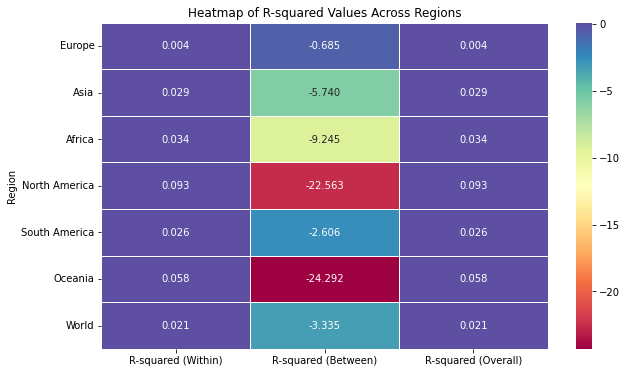

In [87]:
# Heatmap comparing the different R-Squared Values
# Filter R-squared columns
r_squared_data = comparison_model_stats[['R-squared (Within)', 'R-squared (Between)', 'R-squared (Overall)']]

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(r_squared_data, annot=True, fmt=".3f", cmap='Spectral', linewidths=.5)
plt.title('Heatmap of R-squared Values Across Regions')
plt.ylabel('Region')
plt.show()

# Insights:
# Comparing the different R-squared values (within, between and overall), it can be identified that R-squared (within) and R-squared (overall) have minimal variation across the different regions, with values close to 0. 
# The minimal variation and near-zero values for R-squared (Within) and R-squared (Overall) suggest that the unemployment rate poorly explains GDP growth both within individual countries over time and across all regions combined.
# However, R-squared (Between) exhibits high variation across the different regions with highly negative values for North America and Oceania, and close to 0 values for Europe. 
# For North America and Oceania, the highly negative R-squared (Between) suggests that the model performs worse than a simple mean model for explaining differences between countries within these regions.  
# This can be attributed to Insufficient Between-Country Variation or Homogeneity of Economic Structures. 
# In comparison, Europe having close to 0 R-Squared (Between) value suggests that the model is neither good nor terrible at explaining the variance between countries. 
# Several factors could explain this including Diverse Economies in a Common Framework and the presence of Structural Economic Differences between countries

In [88]:
#  Bubble Chart for F-statistic vs R-squared (Overall)
fig = px.scatter(comparison_model_stats, 
                 x='R-squared (Overall)', 
                 y='p-value', 
                 size='F-statistic (Robust)',
                 color=comparison_model_stats.index,
                 title='F-statistic and R-squared Relation',
                 labels={'x': 'R-squared (Overall)', 'y': 'p-value'})
fig.show()

# Insights:
# The larger bubbles indicate a higher F-Statistic which means World has the higher F-statistic followed by North America, Africa and Asia. Oceania. Europe, and South America have small bubbles indicating low F-statistic scores
# With reference to the p-values, regions with low p-values also seem to have larger F-statistic values as seen by the larger sized bubbles nearer to the x-axis
# North America's data suggests a moderately better model fit than other regions (highest R2, statistically significant and relatively higher F-statistic